## 1. 데이터 확인

### 필수 라이브러리

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시

### 데이터 셋 읽어오기

In [4]:
df_train = pd.read_csv("data/train.csv") # 학습용 데이터
df_test = pd.read_csv("data/submission.csv") # 테스트 데이터(제출파일의 데이터)

## 2. 데이터 전처리

### 각 변수별 확인

#### 1. bant_submit

MQL 구성 요소들 중  
[1] Budget(예산)  
[2] Title(고객의 직책/직급)  
[3] Needs(요구사항)  
[4] Timeline(희망 납기일)  
4가지 항목에 대해서 작성된 값의 비율

In [5]:
df_train['bant_submit'].value_counts()

bant_submit
0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: count, dtype: int64

결측지 확인

In [6]:
print(df_train['bant_submit'].isnull().sum())

0


#### 2. customer_country

고객의 국적

In [7]:
df_train['customer_country'].value_counts()

customer_country
//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: count, Length: 15399, dtype: int64

값을 ' / ' 와 ' , ' 의 기준으로 분할 및 마지막 단어를 값으로서 저장

In [8]:
def process_customer_country_tokenized(df, column_name):
    for i, entry in enumerate(df[column_name]):
        if isinstance(entry, str):
            tokens = [token.strip() for token in entry.replace('/', ',').split(',') if token.strip() != '']
            if tokens:
                df.at[i, column_name] = tokens[-1]
            else:
                df.at[i, column_name] = np.nan
        else:
            df.at[i, column_name] = np.nan
    return df

In [9]:
df_train = process_customer_country_tokenized(df_train, 'customer_country')
df_test = process_customer_country_tokenized(df_test, 'customer_country')

In [10]:
df_train['customer_country'].value_counts()

customer_country
India                  16851
Brazil                  8739
United States           3839
Mexico                  2753
Philippines             2570
                       ...  
Basin                      1
PIERMONT                   1
College Place              1
Houlton                    1
37-450 Stalowa Wola        1
Name: count, Length: 1361, dtype: int64

Lg 상품판매와 관련된 홈페이지에서 지정한 리스트의 형태에 맞추어 값을 분류함

In [11]:
# 미국 주 이름 카테고리화
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

df_train['customer_country'] = df_train['customer_country'].replace(us_states, 'United States')
df_test['customer_country'] = df_test['customer_country'].replace(us_states, 'United States')

리스트에 포함되면 값을 그대로 출력  
포함하지 않으면 'Unknown' 값으로 변환

In [12]:
def update_country(country):
    #Lg list 값 
    asia = ['Australia', 'Bangladesh', 'Brunei', 'Cambodia', 'China', 'Fiji', 'Hong Kong', 'India', 'Indonesia', 'Laos', 'Malaysia', 'Maldives', 'Myanmar', 'Nepal', 'New Zealand', 'Papula New Guinea', 'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan', 'Thailand', 'Vietnam', 'Japan', 'South Korea']
    cis = ['Belarus', 'Kazakhstan', 'Mongolia', 'Russia', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
    europe = ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Isle of Man', 'Malta']
    latin_america_and_the_caribbean = ['Anguilla', 'Antigua', 'Argentina', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'British Virgin Islands', 'Cayman Islands', 'Chile', 'Colombia', 'COLOMBIA', 'Costa Rica', 'Cuba', 'Curacao', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Netherlands Antilles', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Saint Lucia', 'St Kitts', 'St Maarten', 'St Vincent', 'Suriname', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'Uruguay', 'US Virgin Islands', 'Venezuela', 'Antigua and Barbuda', 'Saint Kitts and Nevis']
    middle_east_and_africa = ['Afghanistan', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bahrain', 'Benin', 'Botswana', 'Burkina Faso Cameroon', 'Central African Republic', 'Congo', "Cote d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'EGYPT', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guinea Iran', 'Iraq', 'Israel', 'Ivory Coast', 'Jordan', 'Kenya', 'Kuwait', 'Lebanon', 'Liberia', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Nigeria', 'Oman', 'Pakistan', 'Palestine', 'Qatar', 'Rwanda', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Swaziland', 'Syria', 'Togo', 'Tunisia', 'Türkiye', 'Turkey', 'U.A.E', 'Uganda', 'United Republic of Tanzania', 'Yemen', 'Zambia', 'Eritrea', 'Libya Malawi', 'Zimbabwe']
    north_america = ['Canada', 'United States', 'UNITED STATES']

    if country in asia:
        return country
    elif country in cis:
        return country
    elif country in europe:
        return country
    elif country in latin_america_and_the_caribbean:
        return country
    elif country in middle_east_and_africa:
        return country
    elif country in north_america:
        return country
    else:
        return 'Unknown'

df_train['customer_country'] = df_train['customer_country'].apply(update_country)
df_test['customer_country'] = df_test['customer_country'].apply(update_country)


In [13]:
df_train['customer_country'].value_counts()

customer_country
India            16851
Brazil            8739
United States     3850
Unknown           3480
Mexico            2753
                 ...  
St Maarten           1
Montenegro           1
Mongolia             1
Isle of Man          1
Swaziland            1
Name: count, Length: 167, dtype: int64

In [14]:
df_test['customer_country'].value_counts()

customer_country
Brazil                    1045
India                      906
United States              777
Philippines                289
Unknown                    227
                          ... 
Somalia                      1
Tunisia                      1
Israel                       1
Bosnia and Herzegovina       1
Pakistan                     1
Name: count, Length: 88, dtype: int64

In [15]:
print(df_train['customer_country'].isnull().sum())

0


In [16]:
print(df_test['customer_country'].isnull().sum())

0


#### 3. business_unit

MQL 요청 상품에 대응되는 사업부

In [17]:
df_train['business_unit'].value_counts()

business_unit
ID          25563
AS          24774
IT           8664
Solution      296
CM              2
Name: count, dtype: int64

In [18]:
df_test['business_unit'].value_counts()

business_unit
AS    2410
ID    2342
IT     519
Name: count, dtype: int64

df_test에서는 'Solution', 'CM' 에 해당하는 값이 없음을 확인할수 있음

In [19]:
cm_data = df_train[df_train['business_unit'] == 'CM']
print(cm_data)

       bant_submit customer_country business_unit  com_reg_ver_win_rate  \
52519          0.5           Brazil            CM                   NaN   
52520          0.5           Brazil            CM                   NaN   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
52519         24728           NaN  Enterprise                      NaN   
52520         24728           NaN  Enterprise                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
52519               NaN               NaN  ...               LGESP   
52520               NaN               NaN  ...               LGESP   

      expected_timeline  ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
52519               NaN        0       0            NaN                  NaN   
52520               NaN        0       0            NaN                  NaN   

      business_area business_subarea lead_owner is_converted  
52519           NaN              NaN

business_unit의 값아 CM 데이터를 제거하기에는 타겟변수(is_converted)에서 모두 False라는 값을 도출해 냄과 동시에  
다른 변수에서 NaN 값으로 대부분 채워져있는것을 보면 CM일수록 is_converted일 가능성이 높다고 판단  
따라서 drop하지않고 그대로 유지(물론 test 데이터에는 CM값이 있지는 않음)

In [20]:
print(df_train['business_unit'].isnull().sum())

0


#### 4. com_reg_ver_win_rate

[1] Vertical Level 1  
[2] business unit  
[3] region  
3가지 값을 기준으로 oppty 비율을 계산

In [21]:
df_train['com_reg_ver_win_rate'].value_counts()

com_reg_ver_win_rate
0.074949    1130
0.003937     803
0.073248     791
0.642857     782
0.003788     713
            ... 
0.363636      13
0.444444      12
0.400000      12
1.000000      10
0.200000       5
Name: count, Length: 80, dtype: int64

In [22]:
df_train['com_reg_ver_win_rate'].value_counts().sum()

14568

결측치 갯수 확인

In [23]:
print(df_train['com_reg_ver_win_rate'].isnull().sum())

44731


결측치에 대해서 값을 계산해서 넣어줄수 있으면 좋음

'business_area’, ‘business_unit’,'customer_country.1’ 각각이 [1],[2],[3]에 해당

In [24]:
# 그룹화 과정의 느낌을 보기 위해 customer_country.1 대신 customer_country 을 이용함
grouped = df_test.groupby(["customer_country", "business_unit", "business_area"])

이후 과정에서 'customer_country.1' 의 데이터값을 대륙정보로 변환하여  
'com_reg_ver_win_rate' 의 값을 모델을 이용하여 예측을 통한 결측치 대체를 진행

In [25]:
# 'com_reg_ver_win_rate' 열의 모든 값의 종류를 출력
print(grouped['com_reg_ver_win_rate'].apply(lambda x: x.unique()))


customer_country  business_unit  business_area                 
Afghanistan       ID             corporate / office                             [0.075]
                                 power plant / renewable energy                   [nan]
Algeria           AS             retail                            [0.0196078431372549]
Argentina         AS             residential (home)                [0.0037878787878787]
                                 special purpose                   [0.0118577075098814]
                                                                           ...         
Vietnam           ID             factory                           [0.1818181818181818]
                                 hospital & health care                           [nan]
                                 hotel & accommodation                            [nan]
                                 residential (home)                               [nan]
                                 retail                 

In [26]:
grouped['com_reg_ver_win_rate'].value_counts()

customer_country  business_unit  business_area                   com_reg_ver_win_rate
Afghanistan       ID             corporate / office              0.075000                 1
Algeria           AS             retail                          0.019608                 1
Argentina         AS             residential (home)              0.003788                 2
                                 special purpose                 0.011858                 1
                  ID             corporate / office              0.074949                15
                                                                                         ..
Vietnam           AS             power plant / renewable energy  1.000000                 1
                  ID             corporate / office              0.084337                 6
                                 education                       0.214286                 9
                                 factory                         0.181818             

랜포 회귀모형을 이용한 값 예측 및 결측값 대체  
(개별변수 처리 작업이후 라벨인코딩 진행후에 예측값으로 결측치 대체)

In [27]:
print(df_train['com_reg_ver_win_rate'].isnull().sum())

44731


#### 5. customer_idx

고객의 회사명

In [28]:
df_train['customer_idx'].value_counts()

customer_idx
47466    7686
25096    2421
37680     367
18030     331
21321     162
         ... 
39487       1
41241       1
39422       1
22515       1
30268       1
Name: count, Length: 35112, dtype: int64

In [29]:
print(df_train['customer_idx'].isnull().sum())

0


#### 6. customer_type

고객 유형

In [30]:
df_train['customer_type'].value_counts()

customer_type
End-Customer                    6647
End Customer                    3996
Specifier/ Influencer           2525
Channel Partner                 1368
Service Partner                  349
Solution Eco-Partner             146
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         17
Technician                        16
Consultant                        15
Other                             10
Home Owner                        10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Architect/Consultant               5
Homeowner                          5
Reseller                           5
Installer                          5
Interior Designer                  5
Distributor                        4
Others                  

In [31]:
df_test['customer_type'].value_counts()

customer_type
End Customer             2453
Specifier/ Influencer     788
Channel Partner           327
Solution Eco-Partner      146
Service Partner            98
Developer                   1
End-Customer                1
Name: count, dtype: int64

In [32]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'Others': 'Other',
    'Etc.': 'Other',
    'Software / Solution Provider': 'Software/Solution Provider',
    'Specifier/ Influencer': 'Specifier/Influencer',
    'Specifier / Influencer': 'Specifier/Influencer',
    'Distributor': 'Dealer/Distributor',
    'Homeowner': 'Home Owner',
    'Manager / Director' : 'Manager/Director',
    'Commercial end-user': 'End-user',
    'End-Customer': 'End Customer',
    'Consultant': 'Architect/Consultant',
    'Installer': 'Specifier/Influencer',
    'Installer/Contractor': 'Specifier/Influencer',
    
    # LG 카테고리 참고함
    'Corporate' : 'End Customer',
    'Dealer/Distributor' : 'Channel Partner',
    'Reseller' : 'Channel Partner',
    'Technician': 'Specifier/Influencer',
    'Architect/Consultant': 'Specifier/Influencer',
    'Developer': 'End Customer',  
})

df_test['customer_type'] = df_test['customer_type'].replace({
    'Specifier/ Influencer': 'Specifier/Influencer',
    'End-Customer': 'End Customer',

    # LG 카테고리 참고함
    'Developer': 'End Customer',
})

In [33]:
print(df_train['customer_type'].value_counts())

customer_type
End Customer                  10691
Specifier/Influencer           2646
Channel Partner                1375
Service Partner                 349
Solution Eco-Partner            146
HVAC Engineer                    23
Other                            20
Engineer                         20
Home Owner                       15
Architect/Consultant             15
End-user                          9
Manager/Director                  8
Software/Solution Provider        8
Interior Designer                 5
Dealer/Distributor                4
System Integrator                 2
Technical Assistant               1
Administrator                     1
Name: count, dtype: int64


In [34]:
print(df_test['customer_type'].value_counts())

customer_type
End Customer            2455
Specifier/Influencer     788
Channel Partner          327
Solution Eco-Partner     146
Service Partner           98
Name: count, dtype: int64


In [35]:
print(df_train['customer_type'].isnull().sum())

43961


In [36]:
# 'customer_type' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['customer_type'] = df_train['customer_type'].fillna('Unknown')
df_test['customer_type'] = df_test['customer_type'].fillna('Unknown')

print(df_train['customer_type'].isnull().sum())

0


In [37]:
print(df_train['customer_type'].value_counts())

customer_type
Unknown                       43961
End Customer                  10691
Specifier/Influencer           2646
Channel Partner                1375
Service Partner                 349
Solution Eco-Partner            146
HVAC Engineer                    23
Other                            20
Engineer                         20
Home Owner                       15
Architect/Consultant             15
End-user                          9
Manager/Director                  8
Software/Solution Provider        8
Interior Designer                 5
Dealer/Distributor                4
System Integrator                 2
Technical Assistant               1
Administrator                     1
Name: count, dtype: int64


In [38]:
print(df_test['customer_type'].value_counts())

customer_type
End Customer            2455
Unknown                 1457
Specifier/Influencer     788
Channel Partner          327
Solution Eco-Partner     146
Service Partner           98
Name: count, dtype: int64


#### 7. enterprise

[1] Global 기업인지  
[2] Small/Medium 규모의 기업인지

In [39]:
df_train['enterprise'].value_counts()

enterprise
Enterprise    37783
SMB           21516
Name: count, dtype: int64

In [40]:
print(df_train['enterprise'].isnull().sum())

0


#### 8. historical_existing_cnt

이전에 Converted(영업 전환) 되었던 횟수

In [41]:
df_train['historical_existing_cnt'].value_counts()

historical_existing_cnt
4.0       2957
0.0       1973
1.0       1967
19.0      1441
16.0      1132
          ... 
404.0        1
145.0        1
1394.0       1
199.0        1
108.0        1
Name: count, Length: 136, dtype: int64

결측치 갯수 확인

In [42]:
print(df_train['historical_existing_cnt'].isnull().sum())

45543


In [43]:
df_train['historical_existing_cnt'] = df_train['historical_existing_cnt'].fillna(0)
df_test['historical_existing_cnt'] = df_test['historical_existing_cnt'].fillna(0)

print(df_train['historical_existing_cnt'].isnull().sum())

0


#### 9. id_strategic_ver

(도메인 지식) 특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 ID 사업부에 대한 변수

In [44]:
df_train['id_strategic_ver'].value_counts()

id_strategic_ver
1.0    3444
Name: count, dtype: int64

business_unit의 값을 확인하였을때  
ID 사업부의 갯수는 25563개 비해 id_strategic_ver의 1의 값이 3444개인것을 보면  
ID 사업부 중에서도 특별히 가중치를 주는 이유가 존재할것으로 보임

In [45]:
# 누락된 값을 0으로 채우기
df_train['id_strategic_ver'].fillna(0, inplace=True)
df_test['id_strategic_ver'].fillna(0, inplace=True)

df_train['id_strategic_ver'].value_counts()

id_strategic_ver
0.0    55855
1.0     3444
Name: count, dtype: int64

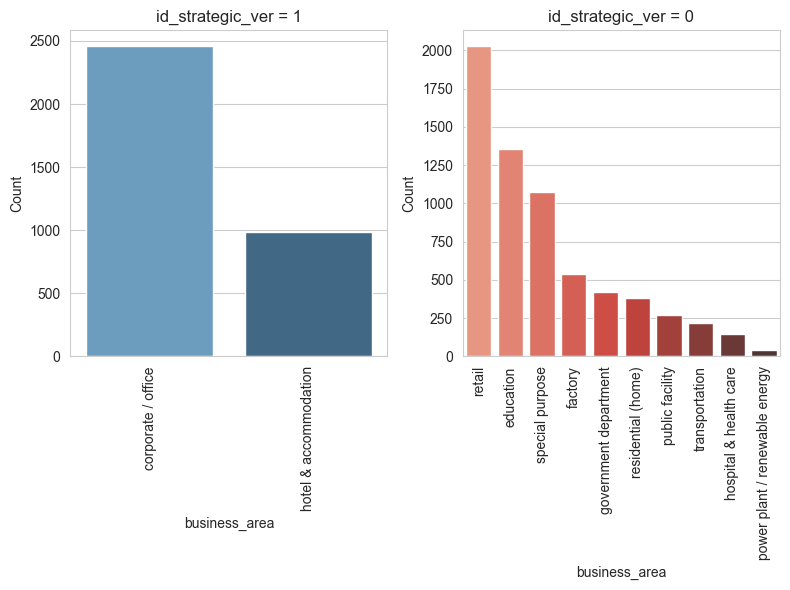

In [46]:
# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'ID']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['id_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['id_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


business_subarea (고객의 세부 사업 영역) 부분에서는 유의미한 차이가 보이지않음

id_strategic_ver 는 결국 business_unit이 'ID'이면서,  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

#### 10. it_strategic_ver

(도메인 지식)   
특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 It 사업부에 대한 변수

In [47]:
df_train['it_strategic_ver'].value_counts()

it_strategic_ver
1.0    1121
Name: count, dtype: int64

In [48]:
# 누락된 값을 0으로 채우기
df_train['it_strategic_ver'].fillna(0, inplace=True)
df_test['it_strategic_ver'].fillna(0, inplace=True)

df_train['it_strategic_ver'].value_counts()

it_strategic_ver
0.0    58178
1.0     1121
Name: count, dtype: int64

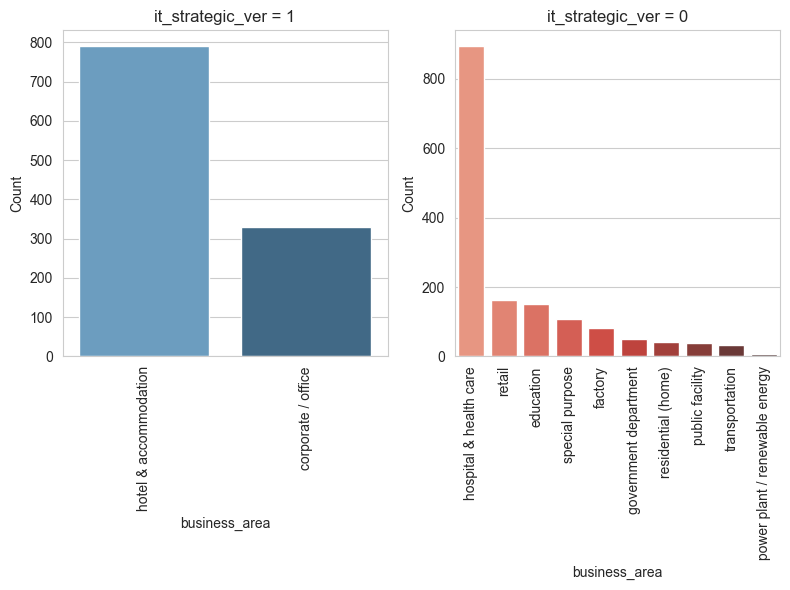

In [49]:
# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'IT']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['it_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['it_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('it_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('it_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


it_strategic_ver 는 business_unit이 'It'이면서,  
고객의 사업영역은 ID 사업부에서의 가중치와 동일하게  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

In [50]:
# business_unit이 'IT'인 데이터만 선택
df_train_it = df_train[df_train['business_unit'] == 'IT']
df_train_it_no = df_train[df_train['business_unit'] != 'IT']

# business_unit이 'IT'인 데이터중에서도 it_strategic_ver = 1 인 값을 business_area 별로 나눔
df_train_it_ho = df_train_it[df_train_it['business_area'] == 'hotel & accommodation']
df_train_it_co = df_train_it[df_train_it['business_area'] == 'corporate / office']

In [51]:
grouped = df_train_it_ho.groupby(["business_unit", "business_area", "business_subarea"])

# 'com_reg_ver_win_rate' 열의 모든 값의 종류를 출력
print(grouped['it_strategic_ver'].apply(lambda x: x.unique()))

grouped['it_strategic_ver'].value_counts()

business_unit  business_area          business_subarea
IT             hotel & accommodation  Cruise              [1.0]
Name: it_strategic_ver, dtype: object


business_unit  business_area          business_subarea  it_strategic_ver
IT             hotel & accommodation  Cruise            1.0                 1
Name: count, dtype: int64

In [52]:
grouped = df_train_it_co.groupby(["business_unit", "business_area", "business_subarea"])

# 'com_reg_ver_win_rate' 열의 모든 값의 종류를 출력
print(grouped['it_strategic_ver'].apply(lambda x: x.unique()))

grouped['it_strategic_ver'].value_counts()

business_unit  business_area       business_subarea    
IT             corporate / office  Advertising             [1.0]
                                   Banking                 [1.0]
                                   Broadcasting & Media    [1.0]
                                   Construction            [1.0]
                                   Consulting              [1.0]
                                   Developer/Property      [1.0]
                                   Engineering             [1.0]
                                   Finance                 [1.0]
                                   Healthcare              [1.0]
                                   IT/Software             [1.0]
                                   Insurance               [1.0]
                                   Law Firm                [1.0]
                                   Manufacturing           [1.0]
                                   Others                  [1.0]
Name: it_strategic_ver, dtype: obj

business_unit  business_area       business_subarea      it_strategic_ver
IT             corporate / office  Advertising           1.0                  5
                                   Banking               1.0                  1
                                   Broadcasting & Media  1.0                  3
                                   Construction          1.0                  6
                                   Consulting            1.0                  9
                                   Developer/Property    1.0                  1
                                   Engineering           1.0                  6
                                   Finance               1.0                  4
                                   Healthcare            1.0                  4
                                   IT/Software           1.0                 27
                                   Insurance             1.0                  1
                                   Law Firm   

#### 11. idit_strategic_ver

Id_strategic_ver이나 it_strategic_ver 값 중   
하나라도 1의 값을 가지면 1 값으로 표현

In [53]:
df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
1.0    4565
Name: count, dtype: int64

In [54]:
# 누락된 값을 0으로 채우기
df_train['idit_strategic_ver'].fillna(0, inplace=True)
df_test['idit_strategic_ver'].fillna(0, inplace=True)

df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
0.0    54734
1.0     4565
Name: count, dtype: int64

#### 12. customer_job

고객의 직업군

In [55]:
df_train['customer_job'].value_counts()

customer_job
engineering                       6342
other                             4852
administrative                    3359
education                         2287
sales                             2218
                                  ... 
appliance specialist                 1
av estimator                         1
purchasers                           1
pricing                              1
exhibition / convention center       1
Name: count, Length: 560, dtype: int64

In [56]:
df_test['customer_job'].value_counts()

customer_job
engineering                         728
others                              482
education                           408
administrative                      307
information technology              231
operations                          195
purchasing                          180
consulting                          166
business development                164
sales                               162
entrepreneurship                    119
arts and design                     102
program and project management       96
marketing                            94
media and communication              48
support                              47
healthcare services                  44
finance                              42
product management                   36
accounting                           34
real estate                          26
other                                24
community and social services        22
legal                                17
human resources            

In [57]:
def search_job(customer_job):
    # LG list 참고
    job = ['accounting','administrative','arts and design','business development','community and social services','consulting','curation','education','engineering', 'entrepreneurship','finance','healthcare services','human resources','information technology','legal','marketing','media and communication','military and protective services operations','product management', 'program and project management','purchasing','quality assurance','real estate','research','sales','support','others']

    # 'media and communications'를 'media and communication'으로 변환
    if customer_job == 'media and communications':
        customer_job = 'media and communication'
    
    if not customer_job:
        return 'others'
    elif customer_job in job:
        return customer_job
    else:
        return 'unknown'

df_train['customer_job'] = df_train['customer_job'].apply(search_job)
df_test['customer_job'] = df_test['customer_job'].apply(search_job)

In [58]:
df_train['customer_job'].value_counts()

customer_job
unknown                           28683
engineering                        6342
administrative                     3359
education                          2287
sales                              2218
purchasing                         1938
information technology             1937
business development               1801
consulting                         1349
arts and design                    1276
entrepreneurship                   1192
marketing                          1161
program and project management      948
others                              763
media and communication             710
healthcare services                 632
product management                  573
finance                             463
accounting                          396
support                             358
real estate                         295
legal                               155
community and social services       137
research                            134
human resources            

In [59]:
df_test['customer_job'].value_counts()

customer_job
unknown                           1684
engineering                        728
others                             482
education                          408
administrative                     307
information technology             231
purchasing                         180
consulting                         166
business development               164
sales                              162
entrepreneurship                   119
arts and design                    102
program and project management      96
marketing                           94
media and communication             49
support                             47
healthcare services                 44
finance                             42
product management                  36
accounting                          34
real estate                         26
community and social services       22
legal                               17
human resources                     14
research                             9
quality assu

In [60]:
print(df_train['customer_job'].isnull().sum())

0


#### 13. lead_desc_length

고객이 작성한 Lead Descriptoin 텍스트 총 길이

In [61]:
df_train['lead_desc_length'].value_counts()

lead_desc_length
3      10378
14      3180
2        934
10       891
4        884
       ...  
824        1
559        1
676        1
907        1
726        1
Name: count, Length: 909, dtype: int64

In [62]:
print(df_train['lead_desc_length'].isnull().sum())

0


In [63]:
# 누락된 값을 0으로 채우기
df_train['lead_desc_length'].fillna('0')
df_test['lead_desc_length'].fillna('0')

print(df_train['lead_desc_length'].isnull().sum())

0


#### 14. inquiry_type

고객의 문의 유형

In [64]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
                                                                                                                       ...  
quotation_                                                                                                                 1
display product                                                                                                 

In [65]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Technical Consultation                 135
Others                                 110
Product Information                     68
Request for Partnership                 63
Usage or Technical Consultation         52
Services                                34
Trainings                               21
Request a Demo                           9
Other                                    9
Customer Suggestions                     4
OEM/ODM Request                          3
other_                                   3
Media Inquiry                            2
Request for Distributorship              1
Name: count, dtype: int64

In [66]:
# 'inquiry_type' 열의 철자오류에 대해 일관된 값으로 변환
## Ctrl + Shift + [ : 현재 영역 접기
df_train['inquiry_type'] = df_train['inquiry_type'].replace({

    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Request for quotation or purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'Purchase or Quotation': 'Quotation or Purchase Consultation',
    'Quotation or Purchase consultation': 'Quotation or Purchase Consultation',
    'Purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',

    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Technical Consultation': 'Usage or Technical Consultation',
    'usage or technical consultation': 'Usage or Technical Consultation',
    'usage_or_technical_consultation': 'Usage or Technical Consultation',
    'Request for technical consulting': 'Usage or Technical Consultation',
    'technical_consultation': 'Usage or Technical Consultation',
    'technical': 'Usage or Technical Consultation',

    'sales':'Sales Inquiry',
    'Sales inquiry':'Sales Inquiry',

    'other': 'Other',
    'other_': 'Other',
    'others': 'Other',
    'Others' : 'Other',
    'Etc.': 'Other',
    'ETC.': 'Other'

})

df_test['inquiry_type'] = df_test['inquiry_type'].replace({

    'Technical Consultation': 'Usage or Technical Consultation',

    'other_': 'Other',
    'Others' : 'Other',

})


In [67]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation                                                                                     42384
Sales Inquiry                                                                                                          10081
Usage or Technical Consultation                                                                                         1668
Other                                                                                                                   1401
Product Information                                                                                                     1237
Trainings                                                                                                                434
Services                                                                                                                 415
Request for Partnership                                                                                         

In [68]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Usage or Technical Consultation        187
Other                                  122
Product Information                     68
Request for Partnership                 63
Services                                34
Trainings                               21
Request a Demo                           9
Customer Suggestions                     4
OEM/ODM Request                          3
Media Inquiry                            2
Request for Distributorship              1
Name: count, dtype: int64

In [69]:
# 'inquiry_type' 열의 값별 개수를 계산합니다.
value_counts = df_train['inquiry_type'].value_counts()

# 2개 이하인 값들의 리스트를 만듭니다.
to_replace = value_counts[value_counts <= 2].index

# 2개 이하인 값들을 'Other'로 업데이트합니다.
df_train['inquiry_type'] = df_train['inquiry_type'].replace(to_replace, 'Other')

df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    42384
Sales Inquiry                         10081
Usage or Technical Consultation        1668
Other                                  1441
Product Information                    1237
Trainings                               434
Services                                415
Request for Partnership                 297
Request a Demo                          184
Technical Support                       110
Request for Distributorship              75
Customer Suggestions                     12
IDB                                      10
Event Inquiry                             5
OEM/ODM Request                           5
Name: count, dtype: int64

df_test 데이터에는 따로 처리 x

In [70]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Usage or Technical Consultation        187
Other                                  122
Product Information                     68
Request for Partnership                 63
Services                                34
Trainings                               21
Request a Demo                           9
Customer Suggestions                     4
OEM/ODM Request                          3
Media Inquiry                            2
Request for Distributorship              1
Name: count, dtype: int64

In [71]:
print(df_train['inquiry_type'].isnull().sum())

941


In [72]:
# 'inquiry_type' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['inquiry_type'] = df_train['inquiry_type'].fillna('Unknown')
df_test['inquiry_type'] = df_test['inquiry_type'].fillna('Unknown')

print(df_train['inquiry_type'].isnull().sum())

0


In [73]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    42384
Sales Inquiry                         10081
Usage or Technical Consultation        1668
Other                                  1441
Product Information                    1237
Unknown                                 941
Trainings                               434
Services                                415
Request for Partnership                 297
Request a Demo                          184
Technical Support                       110
Request for Distributorship              75
Customer Suggestions                     12
IDB                                      10
Event Inquiry                             5
OEM/ODM Request                           5
Name: count, dtype: int64

In [74]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Unknown                               1292
Usage or Technical Consultation        187
Other                                  122
Product Information                     68
Request for Partnership                 63
Services                                34
Trainings                               21
Request a Demo                           9
Customer Suggestions                     4
OEM/ODM Request                          3
Media Inquiry                            2
Request for Distributorship              1
Name: count, dtype: int64

#### 15. product_category

요청 제품 카테고리

In [75]:
df_train['product_category'].value_counts()

product_category
interactive digital board                     6154
vrf                                           5640
multi-split                                   3674
video wall signage                            2029
etc.                                          2018
                                              ... 
system ac                                        1
sac                                              1
gscd046                                          1
43uh5f-h.awzm                                    1
monior/monitor tv,refrigerator,audio/video       1
Name: count, Length: 357, dtype: int64

In [76]:
df_test['product_category'].value_counts()

product_category
vrf                          726
multi-split                  544
interactive signage          400
led signage                  289
etc.                         202
single-split                 179
video wall signage           167
hotel tv                     134
standard signage             118
oled signage                 104
chiller                       99
interactive digital board     74
heating                       67
monitor                       58
high brightness signage       40
medical display               32
ventilation                   31
one:quick series              22
cloud device                  18
webos                         14
laptop                        13
control                       13
projector                     12
software solution             11
pro:centric                   10
hospital tv                   10
special signage                9
accessories                    6
ess                            4
others                    

In [77]:
df_train['product_category'] = df_train['product_category'].replace({
    'notebook': 'laptop',
    'others': 'other',
    'ess': 'other',
    'signage care solution': 'other',
})

print(df_train['product_category'].value_counts())

product_category
interactive digital board                     6154
vrf                                           5640
multi-split                                   3674
video wall signage                            2029
etc.                                          2018
                                              ... 
32 / 43 pol                                      1
videowall signage                                1
43uq751c0sb.bwz                                  1
49uh / 49xf                                      1
monior/monitor tv,refrigerator,audio/video       1
Name: count, Length: 355, dtype: int64


In [78]:
df_test['product_category'] = df_test['product_category'].replace({
    'notebook': 'laptop',
    'others': 'other',
    'ess': 'other',
    'signage care solution': 'other',
})

print(df_test['product_category'].value_counts())

product_category
vrf                          726
multi-split                  544
interactive signage          400
led signage                  289
etc.                         202
single-split                 179
video wall signage           167
hotel tv                     134
standard signage             118
oled signage                 104
chiller                       99
interactive digital board     74
heating                       67
monitor                       58
high brightness signage       40
medical display               32
ventilation                   31
one:quick series              22
cloud device                  18
webos                         14
laptop                        14
control                       13
projector                     12
software solution             11
hospital tv                   10
pro:centric                   10
other                         10
special signage                9
accessories                    6
Name: count, dtype: int64


In [79]:
# 'product_category'의 빈도 계산
counts_train = df_train['product_category'].value_counts()

# 빈도가 특정수치 이하인 product_category 를 찾음
find_count_train = counts_train[counts_train <= 15].index

# 빈도가 특정수치 이하값 
df_train.loc[df_train['product_category'].isin(find_count_train), 'product_category'] = 'other'

In [80]:
print(df_train['product_category'].value_counts())

product_category
interactive digital board         6154
vrf                               5640
multi-split                       3674
video wall signage                2029
etc.                              2018
                                  ... 
services                            20
monitor & pc                        19
commercial tv,tv                    19
aire acondicionado residencial      18
onequick series                     16
Name: count, Length: 64, dtype: int64


In [81]:
print(df_test['product_category'].value_counts())

product_category
vrf                          726
multi-split                  544
interactive signage          400
led signage                  289
etc.                         202
single-split                 179
video wall signage           167
hotel tv                     134
standard signage             118
oled signage                 104
chiller                       99
interactive digital board     74
heating                       67
monitor                       58
high brightness signage       40
medical display               32
ventilation                   31
one:quick series              22
cloud device                  18
webos                         14
laptop                        14
control                       13
projector                     12
software solution             11
hospital tv                   10
pro:centric                   10
other                         10
special signage                9
accessories                    6
Name: count, dtype: int64


In [82]:
print(df_train['product_category'].isnull().sum())

19374


In [83]:
# 'product_category' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['product_category'] = df_train['product_category'].fillna('unknown')
df_test['product_category'] = df_test['product_category'].fillna('unknown')

print(df_train['product_category'].isnull().sum())

0


#### 16. product_subcategory

요청 제품 하위 카테고리

In [84]:
df_train['product_subcategory'].value_counts()

product_subcategory
All Medical Displays         446
Interactive Digital Board    417
TR3BF Series                 374
Transparent OLED Signage     288
Diagnostic Monitors          284
                            ... 
49VL5J                         1
Versatile                      1
UM3F Series                    1
All Monitors &PCs              1
EVR                            1
Name: count, Length: 330, dtype: int64

In [85]:
df_test['product_subcategory'].value_counts()

product_subcategory
Digital Signage or Commercial TVs                                                                       86
Transparent LED Film                                                                                    52
TR3DJ Series                                                                                            32
Interactive Digital Board                                                                               29
Curvable OLED Signage                                                                                   24
                                                                                                        ..
Energy storage, Home automation, PV modules, Solar & water, Solar heating and cooling, hot water, po     1
IDB                                                                                                      1
Curved Series                                                                                            1
LV35A Series     

In [86]:
print(df_train['product_subcategory'].isnull().sum())

50064


In [87]:
# 'product_subcategory' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['product_subcategory'] = df_train['product_subcategory'].fillna('Unknown')
df_test['product_subcategory'] = df_test['product_subcategory'].fillna('Unknown')

print(df_train['product_subcategory'].isnull().sum())

0


#### 17. product_modelname

요청 제품 모델명

In [88]:
df_train['product_modelname'].value_counts()

product_modelname
UltraFine Ergo(32UN880)    523
28MQ780                    479
All Medical Displays       350
43HT3WJ                    290
55CT5WJ                    261
                          ... 
55EJ5E-B                     1
43UT662M (MEA)               1
43UM3DG                      1
32LT340C (EU)                1
55US660H (SCA)               1
Name: count, Length: 665, dtype: int64

In [89]:
print(df_train['product_modelname'].isnull().sum())

50070


In [90]:
# 'product_modelname' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['product_modelname'] = df_train['product_modelname'].fillna('Unknown')
df_test['product_modelname'] = df_test['product_modelname'].fillna('Unknown')

print(df_train['product_modelname'].isnull().sum())

0


#### 18. customer_country.1

담당 자사 법인명 기반의 지역 정보(대륙)

In [91]:
df_test['customer_country.1'].value_counts()

customer_country.1
/  / Peru                           184
//United States                     160
Corporate /  /                      135
/  / Brazil                         132
/  / India                          116
                                   ... 
/ São Paulo/ Guarujá / Brazil         1
/ New York  / United States           1
/ Cortes / Honduras                   1
1233 20th St NW   / Washington /      1
/ Ongole  / India                     1
Name: count, Length: 2467, dtype: int64

In [92]:
def process_customer_country_tokenized(df, column_name):
    for i, entry in enumerate(df[column_name]):
        if isinstance(entry, str):
            tokens = [token.strip() for token in entry.replace('/', ',').split(',') if token.strip() != '']
            if tokens:
                df.at[i, column_name] = tokens[-1]
            else:
                df.at[i, column_name] = np.nan
        else:
            df.at[i, column_name] = np.nan
    return df

In [93]:
df_train = process_customer_country_tokenized(df_train, 'customer_country.1')
df_test = process_customer_country_tokenized(df_test, 'customer_country.1')

In [94]:
df_test['customer_country.1'].value_counts()

customer_country.1
Brazil           1045
India             906
United States     769
Philippines       289
Peru              211
                 ... 
Kimberly            1
CO                  1
Kent                1
Jamaica             1
Birmingham          1
Name: count, Length: 149, dtype: int64

In [95]:
df_test['customer_country.1'].value_counts()

customer_country.1
Brazil           1045
India             906
United States     769
Philippines       289
Peru              211
                 ... 
Kimberly            1
CO                  1
Kent                1
Jamaica             1
Birmingham          1
Name: count, Length: 149, dtype: int64

LG의 대륙 입력값들을 참고하여 해당하는 국가의 이름을 리스트값으로 생성하고  
해당하는 대륙에 대하여 매핑하는 작업

In [96]:
# 미국 주 이름 카테고리화
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

df_train['customer_country.1'] = df_train['customer_country.1'].replace(us_states, 'United States')
df_test['customer_country.1'] = df_test['customer_country.1'].replace(us_states, 'United States')

In [97]:
asia = ['Australia', 'Bangladesh', 'Brunei', 'Cambodia', 'China', 'Fiji', 'Hong Kong', 'India', 'Indonesia', 'Laos', 'Malaysia', 'Maldives', 'Myanmar', 'Nepal', 'New Zealand', 'Papula New Guinea', 'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan', 'Thailand', 'Vietnam', 'Japan', 'South Korea']
cis = ['Belarus', 'Kazakhstan', 'Mongolia', 'Russia', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
europe = ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Isle of Man', 'Malta']
latin_america_and_the_caribbean = ['Anguilla', 'Antigua', 'Argentina', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'British Virgin Islands', 'Cayman Islands', 'Chile', 'Colombia', 'COLOMBIA', 'Costa Rica', 'Cuba', 'Curacao', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Netherlands Antilles', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Saint Lucia', 'St Kitts', 'St Maarten', 'St Vincent', 'Suriname', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'Uruguay', 'US Virgin Islands', 'Venezuela', 'Antigua and Barbuda', 'Saint Kitts and Nevis']
middle_east_and_africa = ['Afghanistan', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bahrain', 'Benin', 'Botswana', 'Burkina Faso Cameroon', 'Central African Republic', 'Congo', "Cote d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'EGYPT', 'Equatorial Guinea', 'Ethiopia', 'Egypt', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guinea Iran', 'Iraq', 'Israel', 'Ivory Coast', 'Jordan', 'Kenya', 'Kuwait', 'Lebanon', 'Liberia', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Nigeria', 'Oman', 'Pakistan', 'Palestine', 'Qatar', 'Rwanda', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Swaziland', 'Syria', 'Togo', 'Tunisia', 'Türkiye', 'Turkey', 'U.A.E', 'Uganda', 'United Republic of Tanzania', 'Yemen', 'Zambia', 'Eritrea', 'Libya Malawi', 'Zimbabwe']
north_america = ['Canada', 'United States', 'UNITED STATES']
# Corporate ->  특정 국가나 지역을 나타내는 것이 아니라, 보통 기업이나 조직을 나타내는 용어

continent_dict = {country: 'Asia' for country in asia}
continent_dict.update({country: 'CIS' for country in cis})
continent_dict.update({country: 'Europe' for country in europe})
continent_dict.update({country: 'Latin America and the Caribbean' for country in latin_america_and_the_caribbean})
continent_dict.update({country: 'Middle East & Africa' for country in middle_east_and_africa})
continent_dict.update({country: 'North America' for country in north_america})

df_train['customer_country.1'] = df_train['customer_country.1'].replace(continent_dict)
df_test['customer_country.1'] = df_test['customer_country.1'].replace(continent_dict)


In [98]:
df_train['customer_country.1'].value_counts()

customer_country.1
Asia                               21911
Latin America and the Caribbean    17717
Europe                              6161
Middle East & Africa                5867
North America                       4137
                                   ...  
Basin                                  1
PIERMONT                               1
College Place                          1
Houlton                                1
37-450 Stalowa Wola                    1
Name: count, Length: 1193, dtype: int64

In [99]:
df_test['customer_country.1'].value_counts()

customer_country.1
Latin America and the Caribbean              1831
Asia                                         1566
North America                                 807
Middle East & Africa                          448
Europe                                        392
Corporate                                     135
Wheaton                                         2
Moffett Field                                   2
Los Angeles                                     2
POMPANO BEACH                                   2
FT HUACHUCA                                     2
New Castle                                      2
San Antonio                                     1
San Juan                                        1
Shelbyville                                     1
Bothell                                         1
montclair                                       1
Sterling Heights                                1
W126 N7449 Flint Drive Menomonee Falls VA       1
233 South Beaudry Avenue  Los A

In [100]:
# 'customer_country.1'의 빈도 계산
counts_train = df_train['customer_country.1'].value_counts()
counts_test = df_test['customer_country.1'].value_counts()

# 일정 빈도 이하 unknown 처리
find_count_train = counts_train[counts_train <= 30].index
find_count_test = counts_test[counts_test <= 2].index

# 일정 빈도 이하인 국가를 'Unknown'으로 설정
df_train.loc[df_train['customer_country.1'].isin(find_count_train), 'customer_country.1'] = 'Unknown'
df_test.loc[df_test['customer_country.1'].isin(find_count_test), 'customer_country.1'] = 'Unknown'

In [101]:
print(df_train['customer_country.1'].isnull().sum())

1651


In [102]:
df_train['customer_country.1'] = df_train['customer_country.1'].fillna('Unknown')
df_test['customer_country.1'] = df_test['customer_country.1'].fillna('Unknown')

In [103]:
df_train['customer_country.1'].value_counts()

customer_country.1
Asia                               21911
Latin America and the Caribbean    17717
Europe                              6161
Middle East & Africa                5867
North America                       4137
Unknown                             3506
Name: count, dtype: int64

In [104]:
df_test['customer_country.1'].value_counts()

customer_country.1
Latin America and the Caribbean    1831
Asia                               1566
North America                       807
Middle East & Africa                448
Europe                              392
Corporate                           135
Unknown                              92
Name: count, dtype: int64

In [105]:
print(df_train['customer_country.1'].isnull().sum())

0


#### 19. customer_position

고객의 회사 직책

In [106]:
df_train['customer_position'].value_counts()

customer_position
none                      19680
manager                    8217
ceo/founder                7984
other                      6499
director                   4843
                          ...  
chairman                      1
pgt physics                   1
education professional        1
chemistry teacher             1
radiology professional        1
Name: count, Length: 117, dtype: int64

In [107]:
df_test['customer_position'].value_counts()

customer_position
none                                                                                      1957
manager                                                                                    726
others                                                                                     639
ceo/founder                                                                                593
director                                                                                   343
associate/analyst                                                                          279
entry level                                                                                225
partner                                                                                    224
c-level executive                                                                           85
intern                                                                                      60
vice president                  

In [108]:
df_train['customer_position'] = df_train['customer_position'].replace({
    'vicepresident': 'vice president',
    'vp': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'founder': 'ceo/founder',
    'ceo/fundador': 'ceo/founder',
    'commercial consultant': 'consultant',
    'architect/consultant': 'consultant',
    'architecture/consult': 'consultant',
    'business unit director': 'director',
    'no influence': 'none',
    'not applicable': 'none',
    'commercial end-user': 'end-user',
    'exhibitiontv': 'exhibition',
    'decision-influencer': 'decision influencer',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'business development': 'business development/sales',
    'medical device manufacturer': 'manufacturer',
    'assistant professor of enlish': 'assistant professor',
    'asst prof.': 'assistant professor',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'principal & director': 'director',
    'others': 'other',
    'decision-maker': 'decision maker',
})

df_test['customer_position'] = df_test['customer_position'].replace({
    'vicepresident': 'vice president',
    'vp': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'founder': 'ceo/founder',
    'ceo/fundador': 'ceo/founder',
    'commercial consultant': 'consultant',
    'architect/consultant': 'consultant',
    'architecture/consult': 'consultant',
    'business unit director': 'director',
    'no influence': 'none',
    'not applicable': 'none',
    'commercial end-user': 'end-user',
    'exhibitiontv': 'exhibition',
    'decision-influencer': 'decision influencer',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'business development': 'business development/sales',
    'medical device manufacturer': 'manufacturer',
    'assistant professor of enlish': 'assistant professor',
    'asst prof.': 'assistant professor',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'principal & director': 'director',
    'others': 'other'
})

# 데이터프레임 생성
table_df = pd.DataFrame(df_train['customer_position'].unique(), columns=['customer_position'])
counts = df_train['customer_position'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
# table_df

In [109]:
df_test['customer_position'].value_counts()

customer_position
none                                                                                      1957
manager                                                                                    726
other                                                                                      664
ceo/founder                                                                                593
director                                                                                   343
associate/analyst                                                                          279
entry level                                                                                225
partner                                                                                    224
c-level executive                                                                           85
intern                                                                                      60
vice president                  

In [110]:
## train
# 'inquiry_type' 열의 값별 개수 계산
counts_train = df_train['customer_position'].value_counts()
counts_test = df_test['customer_position'].value_counts()

# 특정수 이하인 값들의 리스트로 만듬
replace_train = counts_train[counts_train <= 40].index
replace_test = counts_test[counts_test <= 2].index

# 특정수 이하인 값들을 'other'로 업데이트
df_train['customer_position'] = df_train['customer_position'].replace(replace_train, 'other')
df_test['customer_position'] = df_test['customer_position'].replace(replace_test, 'other')

In [111]:
df_train['customer_position'].value_counts()

customer_position
none                 19690
manager               8217
ceo/founder           7988
other                 7841
director              4846
associate/analyst     2597
partner               2536
entry level           2219
c-level executive      857
trainee                849
vice president         521
intern                 446
end-user               431
hospital               201
installer               60
Name: count, dtype: int64

In [112]:
df_test['customer_position'].value_counts()

customer_position
none                 1957
manager               726
other                 676
ceo/founder           593
director              343
associate/analyst     279
entry level           225
partner               224
c-level executive      85
intern                 60
vice president         54
trainee                49
Name: count, dtype: int64

In [113]:
print(df_train['customer_position'].isnull().sum())

0


#### 20. response_corporate

담당 자사 법인명

In [114]:
df_train['response_corporate'].value_counts()

response_corporate
LGEIL    16908
LGESP     9311
LGEUS     5955
LGEMS     2768
LGEPH     2651
LGEGF     2149
LGECB     2079
LGEUK     1651
LGESJ     1469
LGECL     1339
LGEPS     1252
LGEIS     1146
LGEPR     1131
LGEDG     1051
LGEPL      850
LGEEG      704
LGEVH      614
LGEES      592
LGETK      541
LGEAR      491
LGEKR      433
LGEHK      383
LGEAP      366
LGESL      348
LGEMK      331
LGEFS      302
LGEAF      288
LGEIN      281
LGELF      274
LGESA      268
LGECI      263
LGETH      185
LGEEF      159
LGEPT      111
LGEML      110
LGEBN       99
LGEYK       78
LGECH       65
LGEHS       51
LGETT       47
LGEJP       41
LGEAS       33
LGESW       31
LGEMC       30
LGERO       29
LGEEB       13
LGEAG        8
LGERA        8
LGECZ        7
LGELA        2
LGEUR        1
LGEIR        1
LGEBT        1
Name: count, dtype: int64

In [115]:
print(df_train['response_corporate'].isnull().sum())

0


#### 21. expected_timeline

고객의 요청한 처리 일정

In [116]:
df_train['expected_timeline'].value_counts()

expected_timeline
less than 3 months                                                                                                            17250
3 months ~ 6 months                                                                                                            5026
more than a year                                                                                                               3023
9 months ~ 1 year                                                                                                              1101
6 months ~ 9 months                                                                                                            1098
                                                                                                                              ...  
no requirement of this time                                                                                                       1
not reachable , lead shared with partner                  

In [117]:
import numpy as np

# 'months' , 'year'를 포함하지 않는 데이터를 'etc.'로 변경
df_train['expected_timeline'] = np.where(df_train['expected_timeline'].str.contains('months|year', na=False), df_train['expected_timeline'], 'etc.')
df_test['expected_timeline'] = np.where(df_test['expected_timeline'].str.contains('months|year', na=False), df_test['expected_timeline'], 'etc.')

In [118]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                                                                                                                                                                                                                                                        31574
less than 3 months                                                                                                                                                                                                                                          17250
3 months ~ 6 months                                                                                                                                                                                                                                          5026
more than a year                                                                                                                                                                                                

In [119]:
df_test['expected_timeline'].value_counts()

expected_timeline
etc.                   2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64

In [120]:
df_train['expected_timeline'] = df_train['expected_timeline'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months',
    '9 months - 1 year': '9 months ~ 1 year',
    'duplicate lead - il220100042906. less than 3 months': 'less than 3 months',
    'less than 3 months ,meeting with the customer for the more details and tentative boq will ne 32 and 43': 'less than 3 months',

    'less_than_3_months': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'need to discuss with client in next two months. they need to check the product and accridngly proceed for personal use.': 'less than 3 months',
    'quotation sent – 75tr3dj , work in progress, he will buy after 2 months. he has not even seen the quote yet.': 'less than 3 months',
    'quote shared with customer, he will confirm after 2 months. lead shared with partner.': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'less than 3 months. customer not answered . to call back': 'less than 3 months',

    'purchase planning after 3 months': '3 months ~ 6 months',
    'needs hotel tv after 4 months, will call us.': '3 months ~ 6 months',

    'we are already in touch with this cutsomer from last 2 years, he has never purchased any product till date. i called him up twice but no reponse.' : 'etc.',
    'very abrupt customer. said the inquiry was made months ago and was rude enough. closing in the system as the client behaviour has no scope to discuss on requirement. need marketing team to check if the case was received in dec or jan as per client.' : 'etc.',

    # 아래 값들은 근사 기간으로 넣어줌
    'more then 3 months': '3 months ~ 6 months',
    'less than 5 months': '3 months ~ 6 months',
    'less than 6 months': '3 months ~ 6 months',
    'less then 6 months': '3 months ~ 6 months',
    '3 months': '3 months ~ 6 months',
    '4/8 months': '3 months ~ 6 months',

})
df_test['customer_position'] = df_test['customer_position'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months'
})


In [121]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                   31576
less than 3 months     17333
3 months ~ 6 months     5153
more than a year        3027
9 months ~ 1 year       1108
6 months ~ 9 months     1102
Name: count, dtype: int64

In [122]:
df_test['expected_timeline'].value_counts()

expected_timeline
etc.                   2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64

In [123]:
print(df_train['expected_timeline'].isnull().sum())

0


#### 22. ver_cus

특정 Vertical Level 1(사업영역) 이면서  
Customer_type(고객 유형)이 소비자(End-user)인  
경우에 대한 가중치

In [124]:
df_train['ver_cus'].value_counts()

ver_cus
0    56832
1     2467
Name: count, dtype: int64

In [125]:
ss = df_train[df_train['ver_cus'] == 1]
ss['customer_type'].value_counts()

customer_type
End Customer    2463
End-user           4
Name: count, dtype: int64

In [126]:
ss = df_test[df_test['ver_cus'] == 1]
ss['customer_type'].value_counts()

customer_type
End Customer    774
Name: count, dtype: int64

End Customer가 End-user에 해당한다는것을 알수 있음으로 값을 바꿔준다

In [127]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'End Customer': 'End-user'
})
df_test['customer_type'] = df_test['customer_type'].replace({
    'End Customer': 'End-user'
})

In [128]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['customer_type'].value_counts()

customer_type
End-user    2467
Name: count, dtype: int64

'ver_cus' 의 값이 1에 해당하는 'business_area'가 무엇이 있는지 확인하는 작업 진행

In [129]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       1113
retail                    765
education                 472
hotel & accommodation     117
Name: count, dtype: int64

In [130]:
find_ver_cus = df_test[df_test['ver_cus'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       382
retail                   168
hotel & accommodation    131
education                 93
Name: count, dtype: int64

business_area에 대해서는  
'corporate / office', 'retail', 'education', 'hotel & accommodation'   
다음의 Vertical Level 1(사업영역)에 해당함을 확인할수 있음

시각화를 해보면 아래와 같음

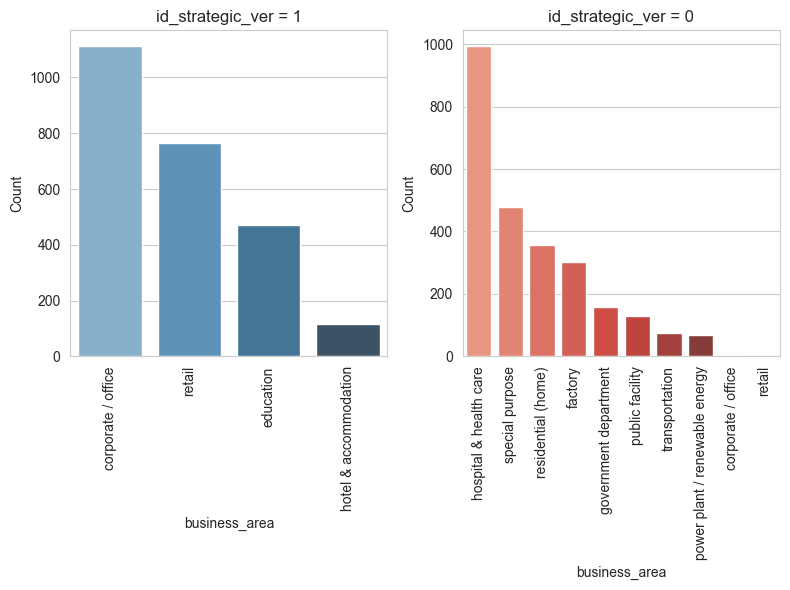

In [131]:
# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['customer_type'] == 'End-user']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_ver_cus_1 = df_train_id[df_train_id['ver_cus'] == 1]
df_train_ver_cus_0 = df_train_id[df_train_id['ver_cus'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_ver_cus_1 = df_train_ver_cus_1['business_area'].value_counts()
count_ver_cus_0 = df_train_ver_cus_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_ver_cus_1.index, y=count_ver_cus_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_ver_cus_0.index, y=count_ver_cus_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [132]:
print(df_train['ver_cus'].isnull().sum())

0


#### 23. ver_pro

특정 Vertical Level 1(사업영역) 이면서   
특정 Product Category(제품 유형)인   
경우에 대한 가중치

In [133]:
df_train['ver_pro'].value_counts()

ver_pro
0    56286
1     3013
Name: count, dtype: int64

In [134]:
df_test['product_category'].value_counts()

product_category
unknown                      1858
vrf                           726
multi-split                   544
interactive signage           400
led signage                   289
etc.                          202
single-split                  179
video wall signage            167
hotel tv                      134
standard signage              118
oled signage                  104
chiller                        99
interactive digital board      74
heating                        67
monitor                        58
high brightness signage        40
medical display                32
ventilation                    31
one:quick series               22
cloud device                   18
laptop                         14
webos                          14
control                        13
projector                      12
software solution              11
hospital tv                    10
other                          10
pro:centric                    10
special signage                

In [135]:
find_ver_cus = df_train[df_train['ver_pro'] == 1]
find_ver_cus['product_category'].value_counts()

product_category
video wall signage                   667
led signage                          641
interactive signage                  406
oled signage                         390
standard signage                     325
hotel tv                             259
high brightness signage              205
special signage                       47
other                                 36
monitor signage,monior/monitor tv     11
smart tv signage                      10
uhd signage                            9
digital signage                        7
Name: count, dtype: int64

In [136]:
find_ver_cus = df_train[df_train['ver_pro'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       1566
retail                   1188
hotel & accommodation     259
Name: count, dtype: int64

In [137]:
find_ver_cus = df_test[df_test['ver_pro'] == 1]
find_ver_cus['product_category'].value_counts()

product_category
led signage                114
hotel tv                    95
standard signage            65
video wall signage          62
interactive signage         47
oled signage                29
high brightness signage     12
special signage              5
Name: count, dtype: int64

In [138]:
find_ver_cus = df_test[df_test['ver_pro'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       201
retail                   133
hotel & accommodation     95
Name: count, dtype: int64

In [139]:
print(df_train['ver_pro'].isnull().sum())

0


#### 24. ver_win_rate_x

전체 Lead 중에서 Vertical을 기준으로  
[a] Vertical 수 비율  
[b] Vertical 별 Lead 수 대비 영업 전환 성공 비율 값  
[a] , [b] 를 곱한 값

In [140]:
df_train['ver_win_rate_x'].value_counts()

ver_win_rate_x
0.003079    4097
0.001183    3011
0.000717    2013
0.000543    1929
0.000298    1818
0.000572    1727
0.000060    1199
0.000215    1035
0.000097     650
0.000026     519
0.000013     306
0.000002     113
Name: count, dtype: int64

In [141]:
df_train['ver_win_rate_x'].value_counts().sum()

18417

결측치 확인

In [142]:
print(df_train['ver_win_rate_x'].isnull().sum())

40882


In [143]:
sd = df_train[df_train['business_area'].isnull()]
total_count = sd['business_unit'].size
total_count

40882

결측값 동일 -> 구할수 없는 값에 대해서는 그냥 빈값으로 두어서 제공된 형태라 따로 계산할 필요 없어 보임

In [144]:
# 'ver_win_rate_x' 변수에서 NaN 값을 0으로 대체
df_train['ver_win_rate_x'] = df_train['ver_win_rate_x'].fillna(0)
df_test['ver_win_rate_x'] = df_test['ver_win_rate_x'].fillna(0)

print(df_train['ver_win_rate_x'].isnull().sum())

0


#### 25. ver_win_ratio_per_bu

특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산

In [145]:
df_train['ver_win_ratio_per_bu'].value_counts()

ver_win_ratio_per_bu
0.064566    2460
0.049840    2028
0.020121    1365
0.048630    1356
0.026846    1278
0.064070    1075
0.071345     984
0.011583     788
0.022634     713
0.060924     540
0.079412     421
0.036913     403
0.035484     385
0.031579     271
0.053571     216
0.051471     210
0.028777     200
0.022727     173
0.128571     156
0.131148     148
0.227273      62
0.285714      43
0.034483      29
Name: count, dtype: int64

결측값 확인

In [146]:
print(df_train['ver_win_ratio_per_bu'].isnull().sum())

43995


해당하는 그룹에서 'ver_win_ratio_per_bu'의 값 출력

In [147]:
grouped = df_train.groupby(["business_area","business_unit"])

# 'ver_win_ratio_per_bu' 열의 모든 값의 종류를 출력
print(grouped['ver_win_ratio_per_bu'].apply(lambda x: x.unique()))

business_area                   business_unit
corporate / office              AS               [0.0268456375838926]
                                ID               [0.0645661157024793]
                                IT                              [nan]
                                Solution         [0.0344827586206896]
education                       AS               [0.0514705882352941]
                                ID                [0.048629531388152]
                                IT                              [nan]
                                Solution                        [nan]
factory                         AS               [0.0369127516778523]
                                ID               [0.0609243697478991]
                                IT                              [nan]
                                Solution                        [nan]
government department           AS               [0.0227272727272727]
                                ID          

In [148]:
grouped['ver_win_ratio_per_bu'].value_counts()

business_area                   business_unit  ver_win_ratio_per_bu
corporate / office              AS             0.026846                1278
                                ID             0.064566                2460
                                Solution       0.034483                  29
education                       AS             0.051471                 210
                                ID             0.048630                1356
factory                         AS             0.036913                 403
                                ID             0.060924                 540
government department           AS             0.022727                 173
                                ID             0.079412                 421
hospital & health care          AS             0.128571                 156
                                ID             0.131148                 148
hotel & accommodation           ID             0.071345                 984
power plant / renewa

In [149]:
print(df_train['ver_win_ratio_per_bu'].isnull().sum())

43995


해당하는 그룹에서 'ver_win_ratio_per_bu' 의 결측값에 대한 예측

In [150]:
# business_area, business_unit 그룹화하여 샘플 수 계산
grouped_counts = df_train.groupby(['business_area', 'business_unit']).size()

# business_area, business_unit, is_converted 그룹화하여 영업 전환된(is_converted) 샘플 수 계산
converted_counts = df_train[df_train['is_converted']].groupby(['business_area', 'business_unit']).size()

# business_area, business_unit별 샘플 수 대비 영업 전환된(is_converted) 샘플 수의 비율 계산
conversion_rates = converted_counts / grouped_counts

# 결과 출력
print(conversion_rates)

business_area                   business_unit
corporate / office              AS               0.029734
                                ID               0.088618
                                IT               0.033333
                                Solution         0.034483
education                       AS               0.066667
                                ID               0.064897
                                IT               0.046667
                                Solution              NaN
factory                         AS               0.059553
                                ID               0.068519
                                IT               0.337349
                                Solution              NaN
government department           AS               0.040462
                                ID               0.076010
                                IT                    NaN
                                Solution              NaN
hospital & health care    

In [151]:
# 그룹별 값을 딕셔너리로 정의
group_values = {
    ('corporate / office', 'AS'): 0.029734,
    ('corporate / office', 'ID'): 0.088618,
    ('corporate / office', 'IT'): 0.033333,
    ('corporate / office', 'Solution'): 0.034483,
    ('education', 'AS'): 0.066667,
    ('education', 'ID'): 0.064897,
    ('education', 'IT'): 0.046667,
    ('education', 'Solution'): None,
    ('factory', 'AS'): 0.059553,
    ('factory', 'ID'): 0.068519,
    ('factory', 'IT'): 0.337349,
    ('factory', 'Solution'): None,
    ('government department', 'AS'): 0.040462,
    ('government department', 'ID'): 0.076010,
    ('government department', 'IT'): None,
    ('government department', 'Solution'): None,
    ('hospital & health care', 'AS'): 0.096154,
    ('hospital & health care', 'ID'): 0.128378,
    ('hospital & health care', 'IT'): 0.378771,
    ('hotel & accommodation', 'AS'): 0.004831,
    ('hotel & accommodation', 'ID'): 0.118902,
    ('hotel & accommodation', 'IT'): 0.002528,
    ('hotel & accommodation', 'Solution'): None,
    ('power plant / renewable energy', 'AS'): 0.129032,
    ('power plant / renewable energy', 'ID'): 0.279070,
    ('power plant / renewable energy', 'IT'): None,
    ('public facility', 'AS'): 0.030000,
    ('public facility', 'ID'): 0.099631,
    ('public facility', 'IT'): 0.025000,
    ('public facility', 'Solution'): None,
    ('residential (home)', 'AS'): 0.017582,
    ('residential (home)', 'ID'): 0.038961,
    ('residential (home)', 'IT'): 0.142857,
    ('residential (home)', 'Solution'): None,
    ('retail', 'AS'): 0.026650,
    ('retail', 'ID'): 0.061637,
    ('retail', 'IT'): 0.073620,
    ('retail', 'Solution'): None,
    ('special purpose', 'AS'): 0.028050,
    ('special purpose', 'ID'): 0.070698,
    ('special purpose', 'IT'): 0.046296,
    ('special purpose', 'Solution'): None,
    ('transportation', 'AS'): 0.037736,
    ('transportation', 'ID'): 0.064815,
    ('transportation', 'IT'): 0.060606,
    ('transportation', 'Solution'): None,
}

# 'business_area'와 'business_unit'에 해당하는 그룹별 값을 'ver_win_ratio_per_bu' 변수에 적용
df_train['ver_win_ratio_per_bu'] = df_train.apply(lambda row: group_values.get((row['business_area'], row['business_unit'])), axis=1)
df_test['ver_win_ratio_per_bu'] = df_test.apply(lambda row: group_values.get((row['business_area'], row['business_unit'])), axis=1)

In [152]:
grouped = df_train.groupby(["business_area","business_unit"])

# 'ver_win_ratio_per_bu' 열의 모든 값의 종류를 출력
print(grouped['ver_win_ratio_per_bu'].apply(lambda x: x.unique()))


business_area                   business_unit
corporate / office              AS               [0.029734]
                                ID               [0.088618]
                                IT               [0.033333]
                                Solution         [0.034483]
education                       AS               [0.066667]
                                ID               [0.064897]
                                IT               [0.046667]
                                Solution              [nan]
factory                         AS               [0.059553]
                                ID               [0.068519]
                                IT               [0.337349]
                                Solution              [nan]
government department           AS               [0.040462]
                                ID                [0.07601]
                                IT                    [nan]
                                Solution              

In [153]:
grouped = df_test.groupby(["business_area","business_unit"])

# 'ver_win_ratio_per_bu' 열의 모든 값의 종류를 출력
print(grouped['ver_win_ratio_per_bu'].apply(lambda x: x.unique()))


business_area                   business_unit
corporate / office              AS               [0.029734]
                                ID               [0.088618]
                                IT               [0.033333]
education                       AS               [0.066667]
                                ID               [0.064897]
                                IT               [0.046667]
factory                         AS               [0.059553]
                                ID               [0.068519]
                                IT               [0.337349]
government department           AS               [0.040462]
                                ID                [0.07601]
                                IT                    [nan]
hospital & health care          AS               [0.096154]
                                ID               [0.128378]
                                IT               [0.378771]
hotel & accommodation           AS               [0.00

In [154]:
print(df_train['ver_win_ratio_per_bu'].isnull().sum())

41100


In [155]:
print(df_test['ver_win_ratio_per_bu'].isnull().sum())

2902


In [156]:
# 결측값 0값으로 대체
df_train['ver_win_ratio_per_bu'].fillna(0, inplace=True)
df_test['ver_win_ratio_per_bu'].fillna(0, inplace=True)

print(df_train['ver_win_ratio_per_bu'].isnull().sum())

0


#### 26. business_area

고객의 사업 영역

In [157]:
df_train['business_area'].value_counts()

business_area
corporate / office                4097
retail                            3011
hotel & accommodation             2013
special purpose                   1929
residential (home)                1818
education                         1727
hospital & health care            1199
factory                           1035
government department              650
public facility                    519
transportation                     306
power plant / renewable energy     113
Name: count, dtype: int64

In [158]:
print(df_train['business_area'].isnull().sum())

40882


In [159]:
# 결측값 'unknown' 값으로 대체
df_train['business_area'].fillna('unknown', inplace=True)
df_test['business_area'].fillna('unknown', inplace=True)

print(df_train['business_area'].isnull().sum())

0


#### 27. business_subarea

고객의 세부 사업 영역

In [160]:
df_train['business_subarea'].value_counts()

business_subarea
Others                           1740
Other Stores                      280
Hospital                          267
Manufacturing Factory / Plant     196
Construction                      191
                                 ... 
Duty Free Shop                      2
Dormitory                           1
Casino Resort                       1
Holdings                            1
Travel Agency                       1
Name: count, Length: 86, dtype: int64

In [161]:
df_test['business_subarea'].value_counts()

business_subarea
Others                                     667
Hotel                                      123
Higher Education (College & University)    111
Other Stores                                82
K12 Kindergarten & Schools                  80
                                          ... 
Travel Agency                                1
Aerospace                                    1
Botanical Garden / Green House               1
Sea Passenger Terminal / Port                1
Bus Terminal                                 1
Name: count, Length: 80, dtype: int64

In [162]:
print(df_train['business_subarea'].isnull().sum())

53773


In [163]:
# 결측값 'Unknown' 값으로 대체
df_train['business_subarea'].fillna('Unknown', inplace=True)
df_test['business_subarea'].fillna('Unknown', inplace=True)

print(df_train['business_subarea'].isnull().sum())

0


#### 28. lead_owner

영업 담당자 이름

In [164]:
df_train['lead_owner'].value_counts()

lead_owner
174    4627
175    4120
97     2499
23     2453
194    2208
       ... 
481       1
909       1
979       1
111       1
756       1
Name: count, Length: 984, dtype: int64

In [165]:
print(df_train['lead_owner'].isnull().sum())

0


#### 29. is_converted (Target)

영업 성공 여부
True일 시 성공 (True or False 값을 가짐)

In [166]:
df_train['is_converted'].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

In [167]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         59299 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            59299 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  59299 non-null  float64
 8   id_strategic_ver         59299 non-null  float64
 9   it_strategic_ver         59299 non-null  float64
 10  idit_strategic_ver       59299 non-null  float64
 11  customer_job             59299 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             59299 non-null  object 
 14  product_category      

In [168]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            5271 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  5271 non-null   float64
 9   id_strategic_ver         5271 non-null   float64
 10  it_strategic_ver         5271 non-null   float64
 11  idit_strategic_ver       5271 non-null   float64
 12  customer_job             5271 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

In [169]:
df_train.to_csv('data/Ch2/df_train.csv', index=False)
df_test.to_csv('data/Ch2/df_test.csv', index=False)

.